# 3.2 線性分類-感知器(Perceptron) 介紹
[來源](https://medium.com/jameslearningnote/84d8b809f866)

# 匯入Iris資料集

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline

In [ ]:
iris = datasets.load_iris()  # iris 是 dict ，裡面包含兩項data與target
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print("target_names: "+str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x,y], axis=1)
iris_data.head(3)

target_names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


# 選出花萼長度、花瓣長度以及花的種類欄位

In [ ]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
target_name = {
    0:'setosa',
    1:'versicolor',
    2:'virginica'
}

In [ ]:
iris_data['target_name'] = iris_data['target'].map(target_name)
iris_data = iris_data[(iris_data['target_name'] == 'setosa')|(iris_data['target_name'] == 'versicolor')]
iris_data = iris_data[['sepal length (cm)','petal length (cm)','target_name']]
iris_data.head(5)

,sepal length (cm),petal length (cm),target_name
0,5.1,1.4,setosa
1,4.9,1.4,setosa
2,4.7,1.3,setosa
3,4.6,1.5,setosa
4,5.0,1.4,setosa


# 把這target_name欄位的兩種花改成1,-1，主要是為了往後方便計算

In [ ]:
target_class = {
    'setosa':1,
    'versicolor':-1
}

In [ ]:
iris_data['target_class'] = iris_data['target_name'].map(target_class)
iris_data.head(5)

,sepal length (cm),petal length (cm),target_name,target_class
0,5.1,1.4,setosa,1
1,4.9,1.4,setosa,1
2,4.7,1.3,setosa,1
3,4.6,1.5,setosa,1
4,5.0,1.4,setosa,1


In [ ]:
iris_data.iloc[40:60]

,sepal length (cm),petal length (cm),target_name,target_class
40,5.0,1.3,setosa,1
41,4.5,1.3,setosa,1
42,4.4,1.3,setosa,1
43,5.0,1.6,setosa,1
44,5.1,1.9,setosa,1
45,4.8,1.4,setosa,1
46,5.1,1.6,setosa,1
47,4.6,1.4,setosa,1
48,5.3,1.5,setosa,1
49,5.0,1.4,setosa,1


# 激勵函數，取名叫sign

In [ ]:
def sign(z):
  if z > 0:
    return 1
  else:
    return -1

In [ ]:
w = np.array([0.,0.,0.])
i=0
x,y = np.concatenate((np.array([1.]), np.array(iris_data.iloc[i])[:2])), np.array(iris_data.iloc[i])[3]

# 視覺化過程來讓新手可以理解。裡面這麼大一串程式碼只有一行重要，就是w += y*x，用來更新w。

>i= 0
iterator: 0
x: [1.0 5.1 1.4]
w: [1.0 5.1 1.4]


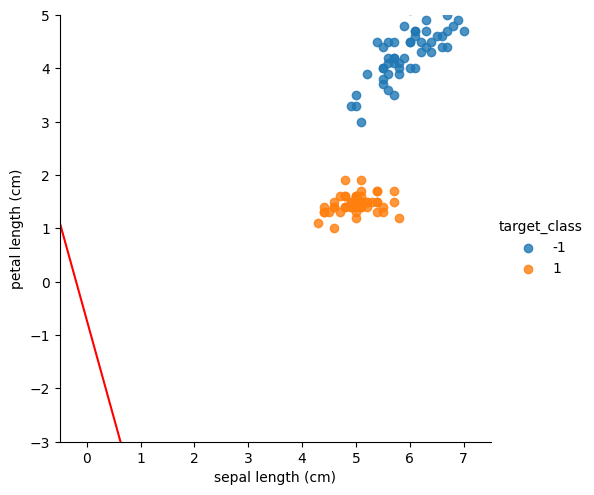

>i= 50
iterator: 1
x: [1.0 7.0 4.7]
w: [0.0 -1.9000000000000004 -3.3000000000000003]


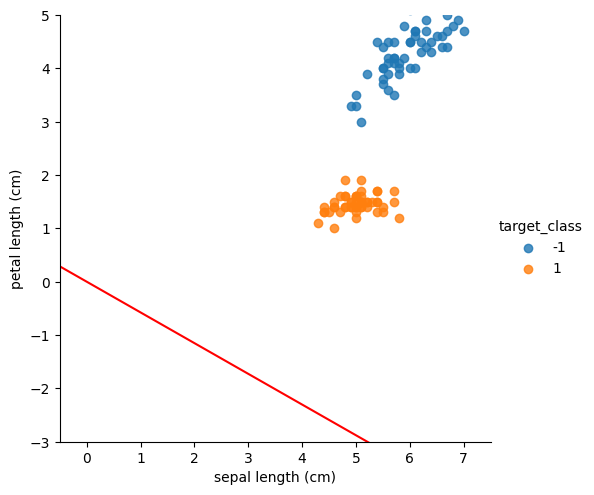

>i= 0
iterator: 2
x: [1.0 5.1 1.4]
w: [1.0 3.1999999999999993 -1.9000000000000004]


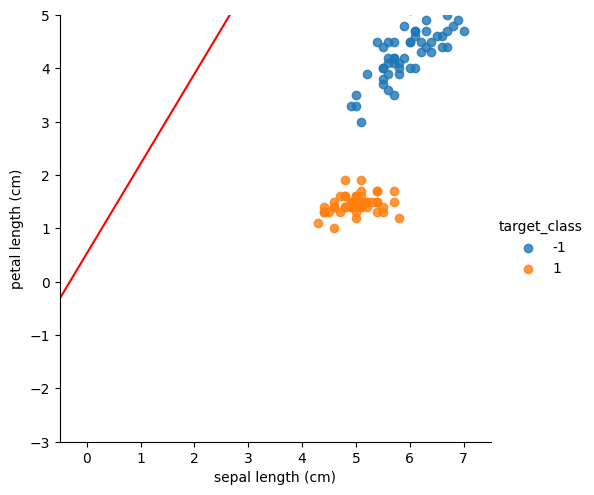

>i= 50
iterator: 3
x: [1.0 7.0 4.7]
w: [0.0 -3.8000000000000007 -6.6000000000000005]


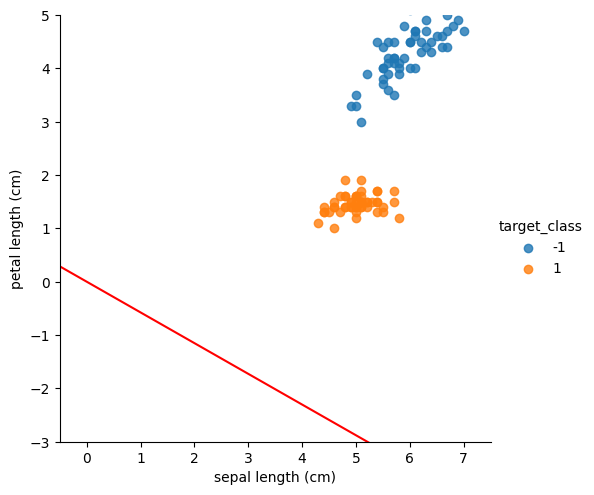

>i= 0
iterator: 4
x: [1.0 5.1 1.4]
w: [1.0 1.299999999999999 -5.200000000000001]


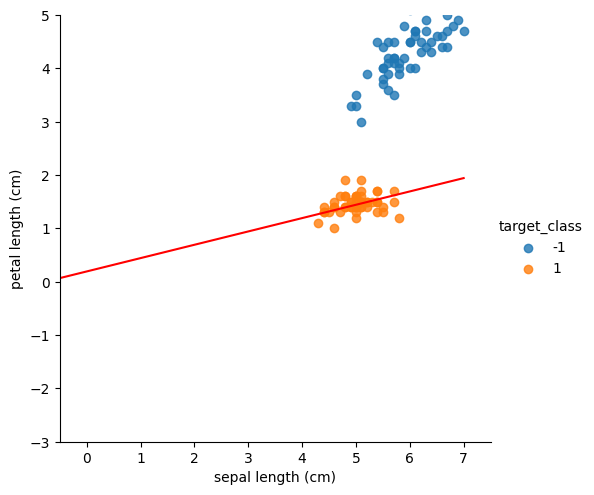

>i= 3
iterator: 5
x: [1.0 4.6 1.5]
w: [2.0 5.899999999999999 -3.700000000000001]


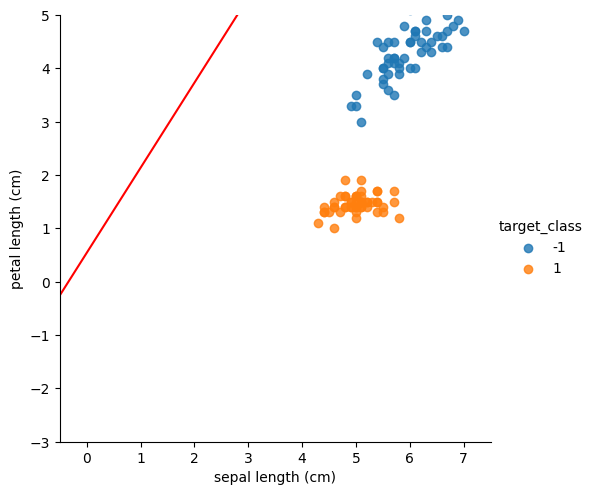

>i= 50
iterator: 6
x: [1.0 7.0 4.7]
w: [1.0 -1.1000000000000014 -8.400000000000002]


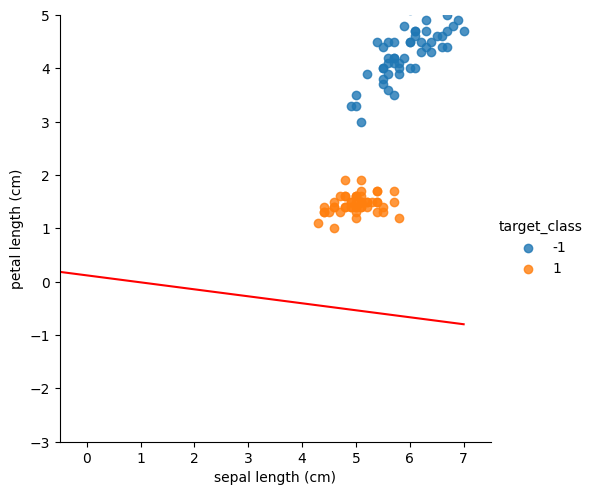

>i= 0
iterator: 7
x: [1.0 5.1 1.4]
w: [2.0 3.9999999999999982 -7.000000000000002]


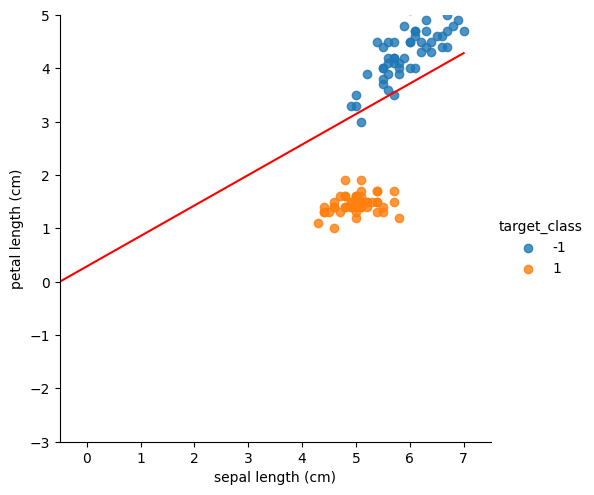

>i= 79
iterator: 8
x: [1.0 5.7 3.5]
w: [1.0 -1.700000000000002 -10.500000000000002]


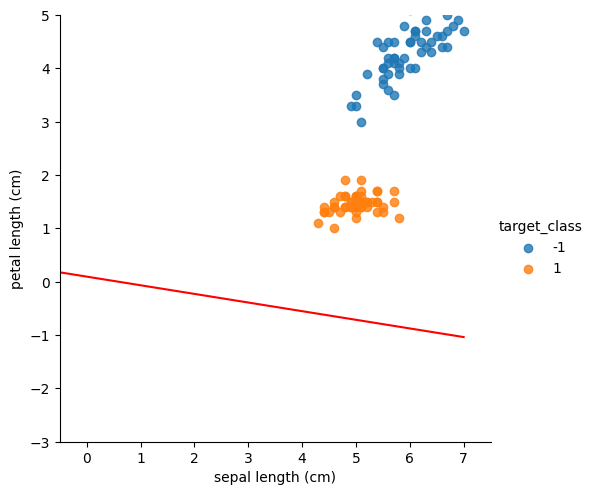

>i= 0
iterator: 9
x: [1.0 5.1 1.4]
w: [2.0 3.3999999999999977 -9.100000000000001]


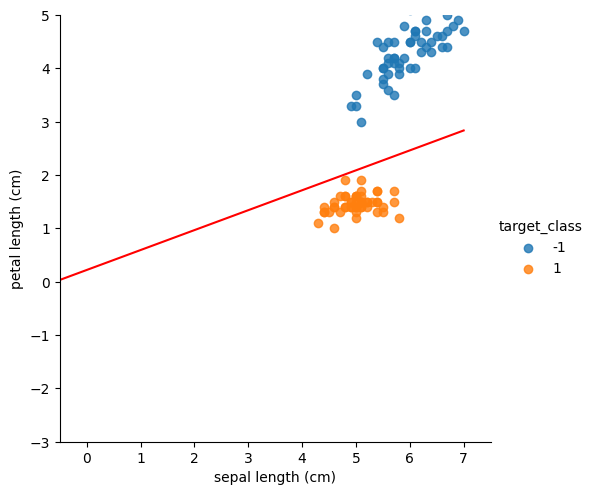

In [ ]:
w = np.array([0.,0.,0.])
error = 1
iterator = 0
while error != 0:
    error = 0
    for i in range(len(iris_data)):

      x,y = np.concatenate((np.array([1.]), np.array(iris_data.iloc[i])[:2])), np.array(iris_data.iloc[i])[3]
      if sign(np.dot(w,x)) != y:
        print(">i=",i)
        print("iterator: "+str(iterator))

        iterator += 1
        error += 1
        sns.lmplot(x='sepal length (cm)',y='petal length (cm)',data=iris_data, fit_reg=False, hue ='target_class')

        # 前一個Decision boundary 的法向量
        # if w[1] != 0:

        #     x_last_decision_boundary = np.linspace(0,w[1])
        #     y_last_decision_boundary = (w[2]/w[1])*x_last_decision_boundary
        #     print("前.......法向量 ",x_last_decision_boundary,"|",y_last_decision_boundary)
        #     plt.plot(x_last_decision_boundary, y_last_decision_boundary,'c--')

        w = w + y*x
        print("x: " + str(x))
        print("w: " + str(w))
        # x向量
        # x_vector = np.linspace(0,x[1])
        # y_vector = (x[2]/x[1])*x_vector
        # plt.plot(x_vector, y_vector,'b')
        # Decision boundary 的方向向量
        x_decision_boundary = np.linspace(-0.5,7)
        y_decision_boundary = (-w[1]/w[2])*x_decision_boundary - (w[0]/w[2])
        plt.plot(x_decision_boundary, y_decision_boundary,'r')
        # Decision boundary 的法向量
        # x_decision_boundary_normal_vector = np.linspace(0,w[1])
        # y_decision_boundary_normal_vector = (w[2]/w[1])*x_decision_boundary_normal_vector
        # plt.plot(x_decision_boundary_normal_vector, y_decision_boundary_normal_vector,'g')
        plt.xlim(-0.5,7.5)
        plt.ylim(-3,5)
        plt.show()